# Hipotesis relativas a dos medias de muestras con datos apareados
###### https://www.chreinvent.com/recursos/hip%C3%B3tesis-de-2-medias

In [24]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
import statsmodels.stats.weightstats as smws

+ Los datos que se muestran más abajo incluyen a cinco temperaturas mínimas reales y las correspondientes temperaturas mínimas que se pronosticaron cinco días antes 
    + (según datos registrados por el estadísta Mario Triola). 
    Se trata de datos apareados, puesto que cada par de valores representa al mismo día. 
+ Mínima real: 54, 54, 55, 60, 64 
+ Mínima pronosticada cinco días antes: 56, 57, 59, 56, 64
+ Diferencia real -  pronosticada: -2, -3, -4, 4, 0

+ Las temperaturas pronosticadas parecen ser muy diferentes de las temperaturas reales, pero...
    + ¿existe suficiente evidencia para concluir que la diferencia media no es de cero? 
    Se utiliza un nivel de significancia de 0.05 para probar la aseveración de que existe una diferencia 
        + entre las temperaturas mínimas reales y las temperaturas mínimas pronosticadas cinco días antes.

### Hipótesis:
+ H₀: La diferencia media entre la temperatura real y la pronosticada es cero (μd = 0).
+ H₁: La diferencia media entre la temperatura real y la pronosticada es diferente de cero (μd ≠ 0).
+ Nivel de significancia: α = 0.05

#### Consideramos cada uno de los tres requisitos:

+ Datos apareados: Los datosmuestrales consisten en datos apareados referentes al mismo día. 
+ La temperatura real mínima es la temperatura que se registró el día en cuestión, 
+ y el otro valor es la temperatura mínima pronosticada para ese día cinco días antes. 

+ En vez de tratarse de una muestra aleatoria simple, tenemos resultados de los primeros cinco días consecutivos del conjunto de datos. 
+ Éste podría ser un problema que surge de factores como un pronosticador sumamente malo (o bueno) que solamente hizo el pronóstico para esos cinco días. 
+ Supondremos que existe un sistema más general de pronóstico, y que los días son típicos de los que resultarían de una muestra aleatoria simple. 

#### 1.a) Calculos con las formulas estadísticas

In [25]:
# Datos
real = np.array([54, 54, 55, 60, 64])
pronosticada = np.array([56, 57, 59, 56, 64])
diferencia = real - pronosticada

# Estadísticos
n = len(diferencia)
media_diferencia = np.mean(diferencia)
desviacion_estandar_diferencia = np.std(diferencia, ddof=1)  # ddof=1 para la muestra
error_estandar = desviacion_estandar_diferencia / np.sqrt(n)

# Estadístico t
t = media_diferencia / error_estandar

# Grados de libertad
gl = n - 1
print('Grados de libertad:', gl)

# Valor crítico (bilateral)
# Usando una tabla t o una función como scipy.stats.t.ppf
valor_critico = stats.t.ppf(1 - 0.05/2, gl)
print(f"Valor crítico: {valor_critico:.4f}")

# Valor p
valor_p = 2 * stats.t.cdf(-abs(t), gl)  # Bilateral

print("\nPrueba de hipótesis de datos apareados usando formulas:")
print(f"Estadístico t: {t:.4f}")
print(f"Valor p: {valor_p:.4f}")

Grados de libertad: 4
Valor crítico: 2.7764

Prueba de hipótesis de datos apareados usando formulas:
Estadístico t: -0.7071
Valor p: 0.5185


In [26]:
# Prueba t para muestras pareadas con statsmodels
t_stat, p_value = stats.ttest_rel(real, pronosticada)

print("\nPrueba de hipótesis de datos apareados usando Scipy stats.ttest_rel:")
print('Estadístico t:', t_stat)
print('Valor p:', p_value)


Prueba de hipótesis de datos apareados usando Scipy stats.ttest_rel:
Estadístico t: -0.7071067811865475
Valor p: 0.5185185185185183


**Interpretación**
+ Los datos muestrales no ofrecen suficiente evidencia para sustentar la aseveración de que las temperaturas mínimas reales y pronosticadas para cinco días son diferentes. 
    + Esto no significa que las temperaturas reales y pronosticadas sean iguales. 
    + Es decir, las diferencias observadas podrían deberse al azar.
+ Quizá datos muestrales adicionales darían la evidencia necesaria para concluir que las temperaturas mínimas reales y pronosticadas son diferentes.

**Método del  valor P**
+ Los resultados de este ejemplo se dan utilizando el método tradicional, pero se puede usar el método del valor P con python.
+ Una vez más, no rechazamos la hipótesis nula, puesto que el valor P es mayor que el nivel de significancia de a   0.05.

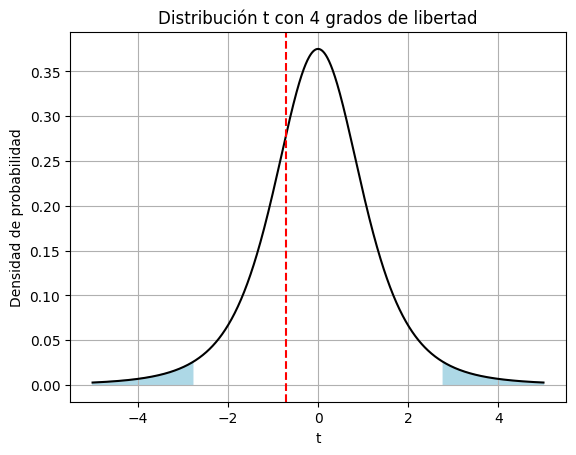

In [27]:
# Crear una secuencia de valores para la distribución t
x = np.linspace(-5, 5, 1000)
y = stats.t.pdf(x, gl)

# Graficar la distribución
plt.plot(x, y, 'k')
plt.fill_between(x, 0, y, where=(x <= -valor_critico) | (x >= valor_critico), color='lightblue')
plt.axvline(x=t, color='red', linestyle='--')

# Etiquetas y título
plt.xlabel('t')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución t con 4 grados de libertad')
plt.grid(True)

# Mostrar el gráfico
plt.show()

## Intervalo de confianza
+ Es posible revisar todo lo analizado através del cáclulo del intervalo de confianza
###### https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.DescrStatsW.html#statsmodels.stats.weightstats.DescrStatsW

In [28]:
# Cálculo del intervalo de confianza del 95%
mean_diff = np.mean(diferencia)
conf_int = smws.DescrStatsW(diferencia).tconfint_mean(alpha=0.05)

print(f"Media de la diferencia: {mean_diff:.4f}")
print(f"Intervalo de confianza del 95%: {conf_int}")


Media de la diferencia: -1.0000
Intervalo de confianza del 95%: (-4.926486322955122, 2.926486322955122)


_________________________________________________________________________________________________________________________________________________________________________

In [29]:
# Crear un DataFrame
import pandas as pd
data = {'real': real, 'pronosticada': pronosticada}
df = pd.DataFrame(data)

# Modelo
model = ols('real ~ pronosticada - 1', data=df).fit()  # -1 para eliminar la intersección
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   real   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              1655.
Date:                Sun, 18 Aug 2024   Prob (F-statistic):                    2.18e-06
Time:                        20:27:24   Log-Likelihood:                         -12.288
No. Observations:                   5   AIC:                                      26.58
Df Residuals:                       4   BIC:                                      26.18
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

c:\Users\Dani\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
